# In This Notebook we will do Visual Analysis on the **Absenteeism at Work** dataset. 
- This notebook is motivated by the data analysis workshop by Gururajan Govindan, Shubhangi Hora, and Konstantin Palagachev

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_palette('tab10')

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com'\
                   '/PacktWorkshops/The-Data-Analysis-Workshop'\
                   '/master/Chapter02/data/'\
                   'Absenteeism_at_work.csv', sep=";")
data.head().T

,0,1,2,3,4
ID,11.000,36.000,3.000,7.000,11.000
Reason for absence,26.000,0.000,23.000,7.000,23.000
Month of absence,7.000,7.000,7.000,7.000,7.000
Day of the week,3.000,3.000,4.000,5.000,5.000
Seasons,1.000,1.000,1.000,1.000,1.000
Transportation expense,289.000,118.000,179.000,279.000,289.000
Distance from Residence to Work,36.000,13.000,51.000,5.000,36.000
Service time,13.000,18.000,18.000,14.000,13.000
Age,33.000,50.000,38.000,39.000,33.000
Work load Average/day,239.554,239.554,239.554,239.554,239.554


# Descriptive Statistics 
#### As a rule of thumb it is a good thing to start the analysis by displaying the shape, missing values, types of columns and a discription about the data.

- By using the info() function:
    1. We can easily find the shape is 740 entries and total 21 columns.
    2. No missing values and types of columns.
    3. By looking at the head of the data and the info() We have to do some decoding to columns like " Month of absence,Day of the week, Seasons,Disciplinary failure, Education, Social drinker, Social smoker "
    4. We have 2 Boolean columns (Social drinker and Social smoker).


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

- Using the describe function to show the description of the numerical data.
    1. We have 28 different reasons for absence 0-28 excluding 20.
    2. Range of Ages 27-58.
    3. by looking to the (mean, median) Seems that Transportation expense and Service time will be normally distributed. but Abenteeism time in hours wouldn't be normally distributed 
    4. Seems that Hit target column is a percentage of hitting the target.

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


#  Data Preprocessing
- Decoding and Categorizing Variables:
    1. Some columns need to be decoded as mentioned in the info phase.
    2. We can categorize the Reason for absence into categories Disease and not a Disease "yes/no" by the International Code of Diseases (ICD)
    3. We can also cluster the Body mass index into three categories (Obese, Normal weight and Over weight)
    4. We can categorize absence based on age (Early young adults, Mid young adults, Mid career Professionals, Late career Professionals and Pre-retirement).

In [26]:
# Define decoding dictionaries
month_decoding = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
    0: "Unknown"
}

day_of_week_decoding = {
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday"
}

season_decoding = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

education_decoding = {
    1: "High School",
    2: "Graduate",
    3: "Postgraduate",
    4: "Master/PhD"
}

yes_no_decoding = {
    0: "No",
    1: "Yes"
}

In [27]:
preprocessed_data = data.copy()

# Define encoding dictionaries
decoding_dict = {
    "Month of absence": month_decoding,
    "Day of the week": day_of_week_decoding,
    "Seasons": season_decoding,
    "Education": education_decoding,
    "Disciplinary failure": yes_no_decoding,
    "Social drinker": yes_no_decoding,
    "Social smoker": yes_no_decoding
}

# Backtransform numerical variables to categorical using replace() method
preprocessed_data.replace(decoding_dict, inplace=True)

# Print the transformed data
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


- Creating Column Disease for the disease reasons and non-disease values.

In [28]:
# Use lambda function instead of defining a separate function as it
preprocessed_data["Disease"] = preprocessed_data["Reason for absence"].\
                                apply(
                                        lambda val: 'Yes' if val > 0 and val <= 21 else "No"
                                    )

- Categorizing people by the body mass index

In [29]:
def bod_ms_ind(val):
    if val < 18.5:
        return 'Underweight'
    elif val < 25:
        return 'Normal Weight'
    elif val < 30:
        return 'Overweight'
    else:
        return 'Obese'

preprocessed_data['BMI category'] = preprocessed_data['Body mass index'].apply(bod_ms_ind)


- Categorizing People by their age

In [30]:
def age_categorization(val):
    if val <= 30:
        return 'Early young adult'
    elif val <= 35:
        return 'Mid young adult'
    elif val <= 44:
        return 'Mid career professional'
    elif val <= 53:
        return 'Late career professional'
    else:
        return 'Pre-retirement'
    
preprocessed_data['Career level'] = preprocessed_data['Age'].apply(age_categorization)

# The Dataset is Ready for the Visual Analysis. It's been preprocessed and cleaned. 

#### As a starting Point we will look at the histogram of all the columns at once then we'll analyze them one by one.
- Our expectations about the distribution is correct as the Transportation expense and Service time will be normally distributed. but Abenteeism time in hours wouldn't be normally distributed.

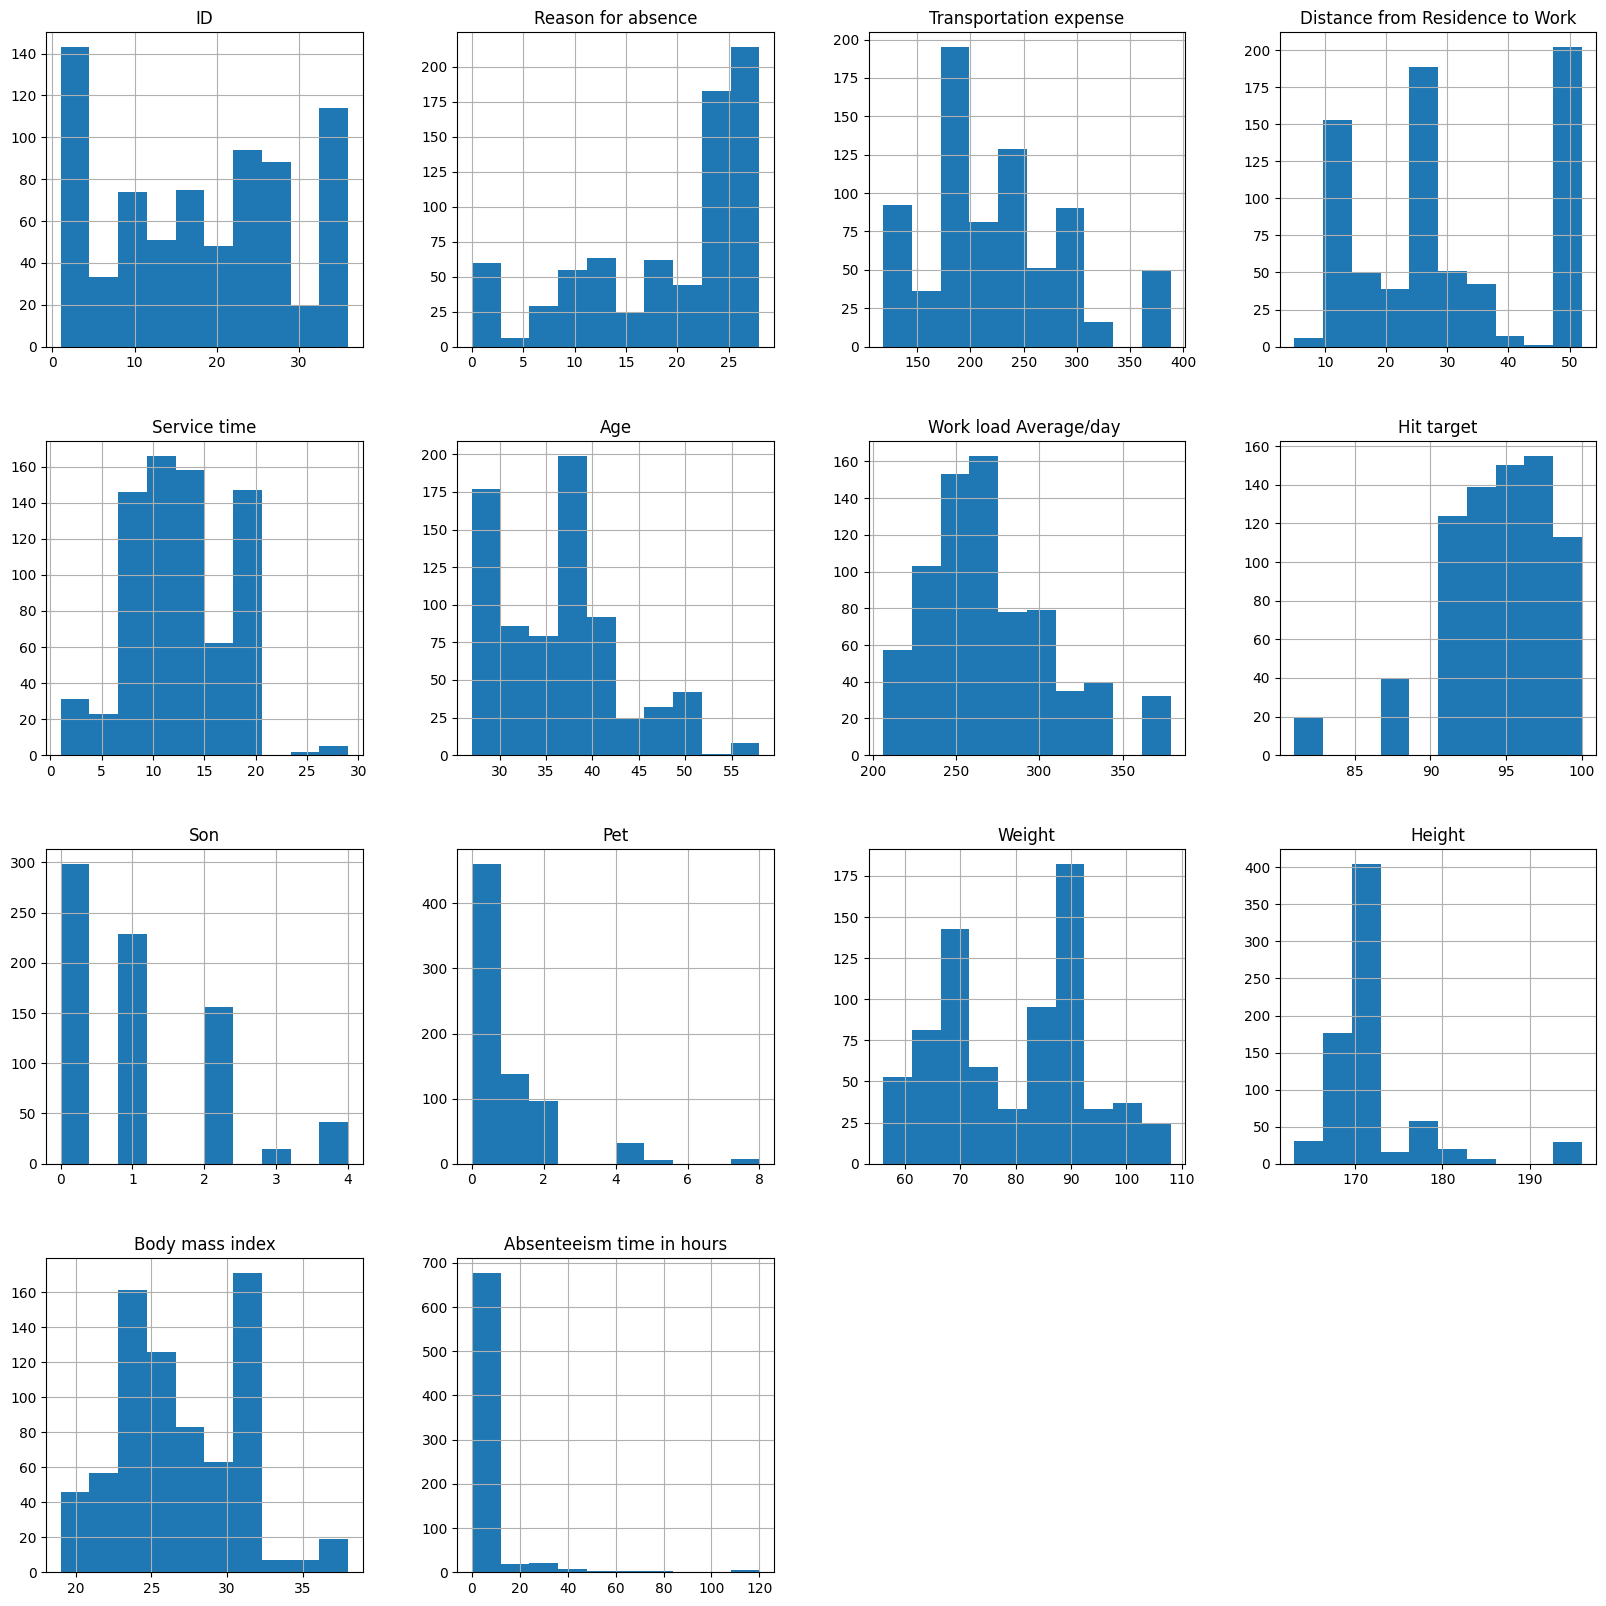

In [31]:
preprocessed_data.hist(figsize=(20, 20))
plt.savefig('figs/distributions of all columns.png', format='png')
plt.show()

### As We will go through many Countplots and histograms I will build a function for this:

In [32]:
def plot_distribution(col, figsize=(12, 6), rotation=0, hue=None, color=None):
    plt.figure(figsize=figsize)
    sns.countplot(data=preprocessed_data,
                  x=col,
                  hue=hue,
                  color=color)
    plt.title(f'Distribution of {col} column')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=rotation)
    plt.savefig(f'figs/Distribution of {col} respect to {hue}.png', format='png')
    plt.show()

#### Our most concern at the distributional analysis is the Reason for absence column. so we will lead with it.
- There is a huge peek at the 23, 28 and 27 Reasons, The three of them belong to the Not Disease Category.
- The Social smoker hue seems to exist a lot more for the disease category. we need violin plot for this.
- The Social drinker hue seem to exist a lot more for the non disease category. also need a violin plot to further test.

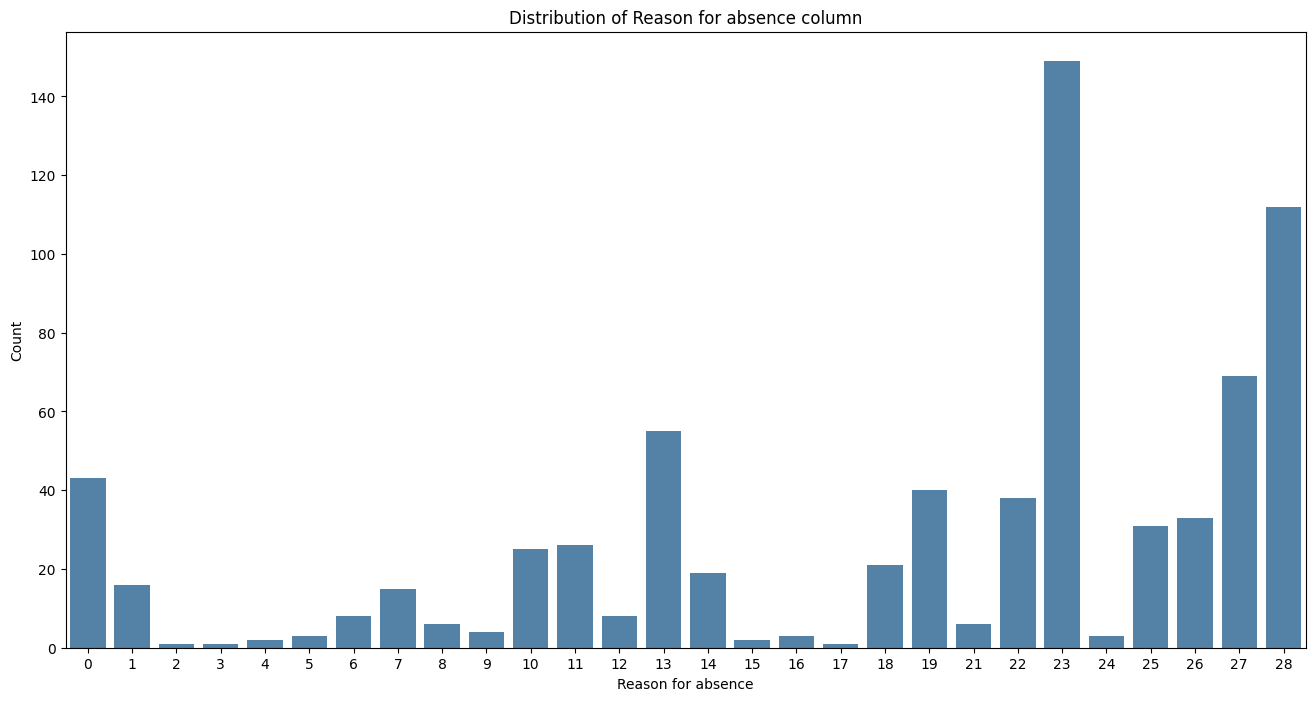

In [33]:
plot_distribution('Reason for absence', figsize=(16, 8), color='steelblue')

- Non-Disease Reasons tend to exist more than Disease ones. and on this observation we will lead with any other hue column. (we need to test that)


No     0.645946
Yes    0.354054
Name: Disease, dtype: float64


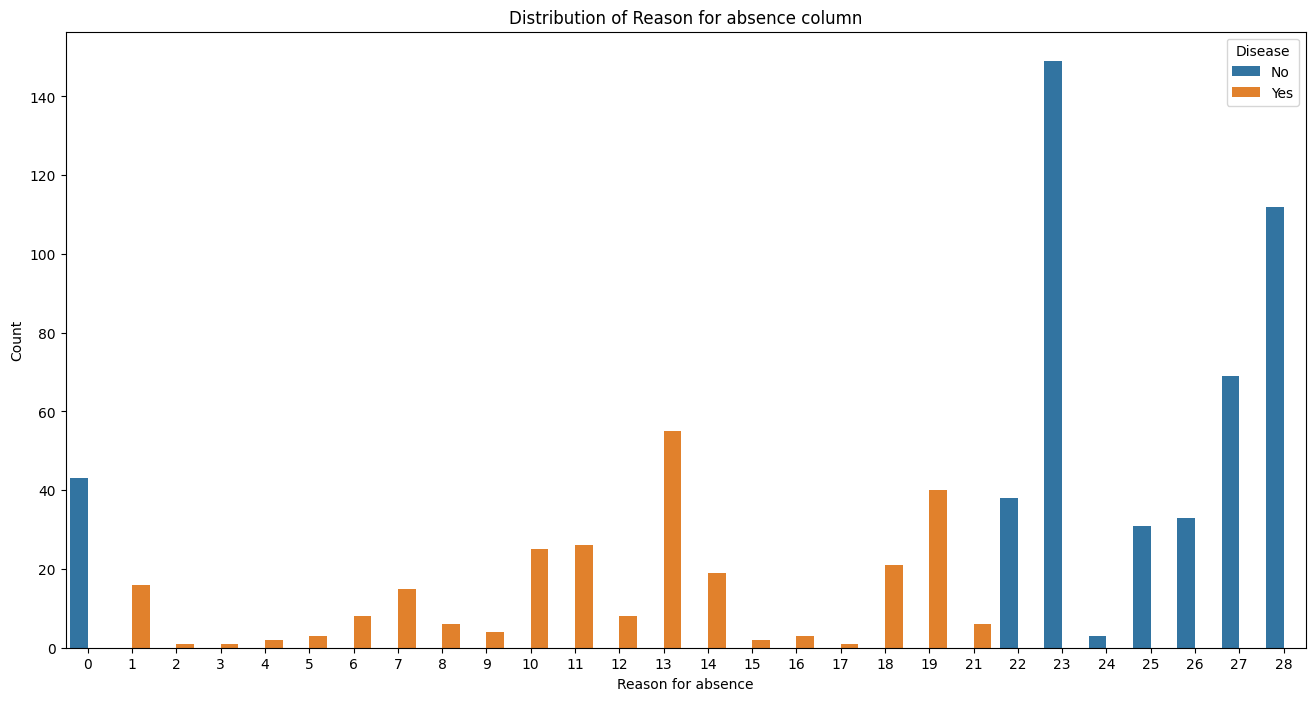

In [65]:
print(preprocessed_data.Disease.value_counts(normalize=True))
plot_distribution('Reason for absence', figsize=(16, 8), hue='Disease')

- Non-Smoking people in the Not-Disease area tend to exist more than Non-smoking people in the Disease are.
- Smokers in the disease are equal to the Smokers in the Not-Disease area.

Disease  Social smoker
No       No               451
         Yes               27
Yes      No               235
         Yes               27
Name: Social smoker, dtype: int64


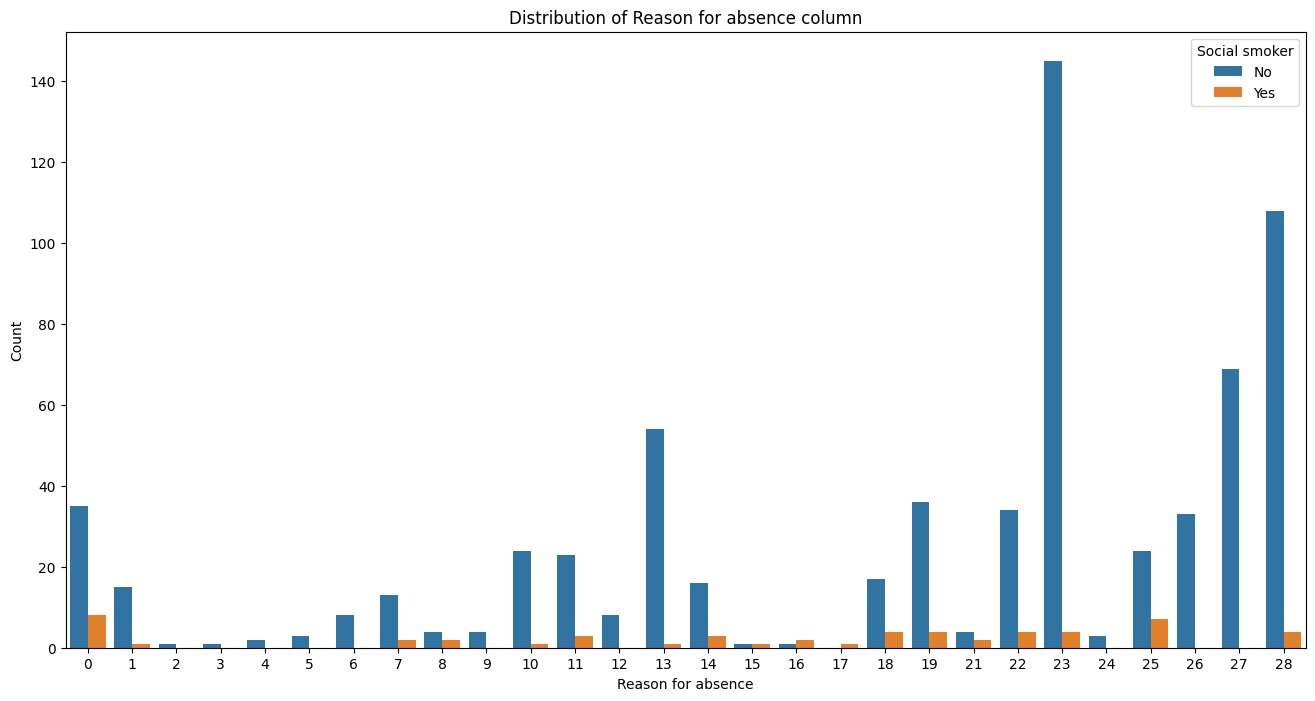

In [80]:
print(preprocessed_data.groupby('Disease')['Social smoker'].value_counts())
plot_distribution('Reason for absence', figsize=(16, 8), hue='Social smoker')

- Sounds like Drinking tend to have positive impact on the absence.

Disease  Social drinker
No       Yes               281
         No                197
Yes      Yes               139
         No                123
Name: Social drinker, dtype: int64


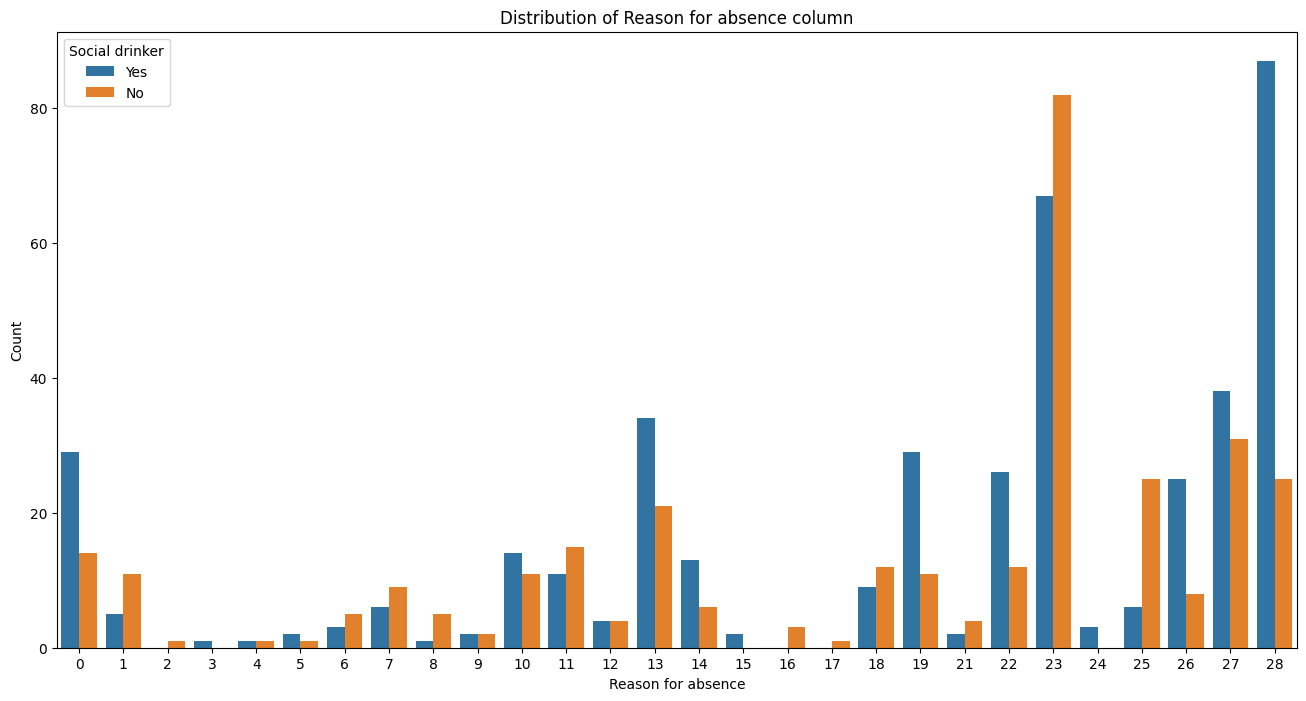

In [79]:
print(preprocessed_data.groupby('Disease')['Social drinker'].value_counts())
plot_distribution('Reason for absence', figsize=(16, 8), hue='Social drinker')

- high school education grade appears in the dataset more any other grade.

Disease  Education   
No       High School     412
         Postgraduate     45
         Graduate         19
         Master/PhD        2
Yes      High School     199
         Postgraduate     34
         Graduate         27
         Master/PhD        2
Name: Education, dtype: int64


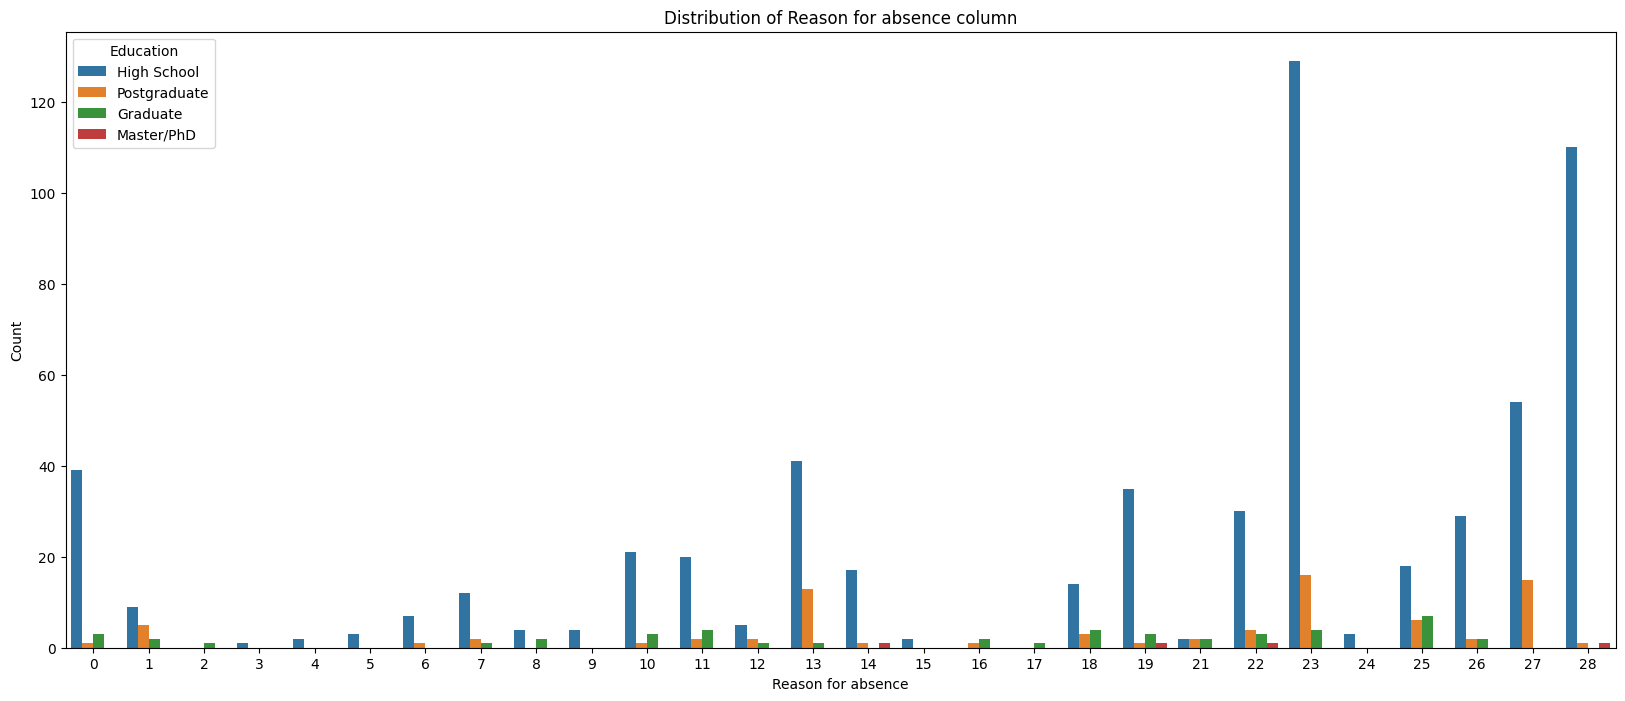

In [76]:
print(preprocessed_data.groupby('Disease')['Education'].value_counts())
plot_distribution('Reason for absence', figsize=(20, 8), hue='Education')

- the order of the BMI catgories differs in the Disease and Non-Disease area.

Disease  BMI category 
No       Obese            173
         Normal Weight    160
         Overweight       145
Yes      Normal Weight    104
         Overweight        87
         Obese             71
Name: BMI category, dtype: int64


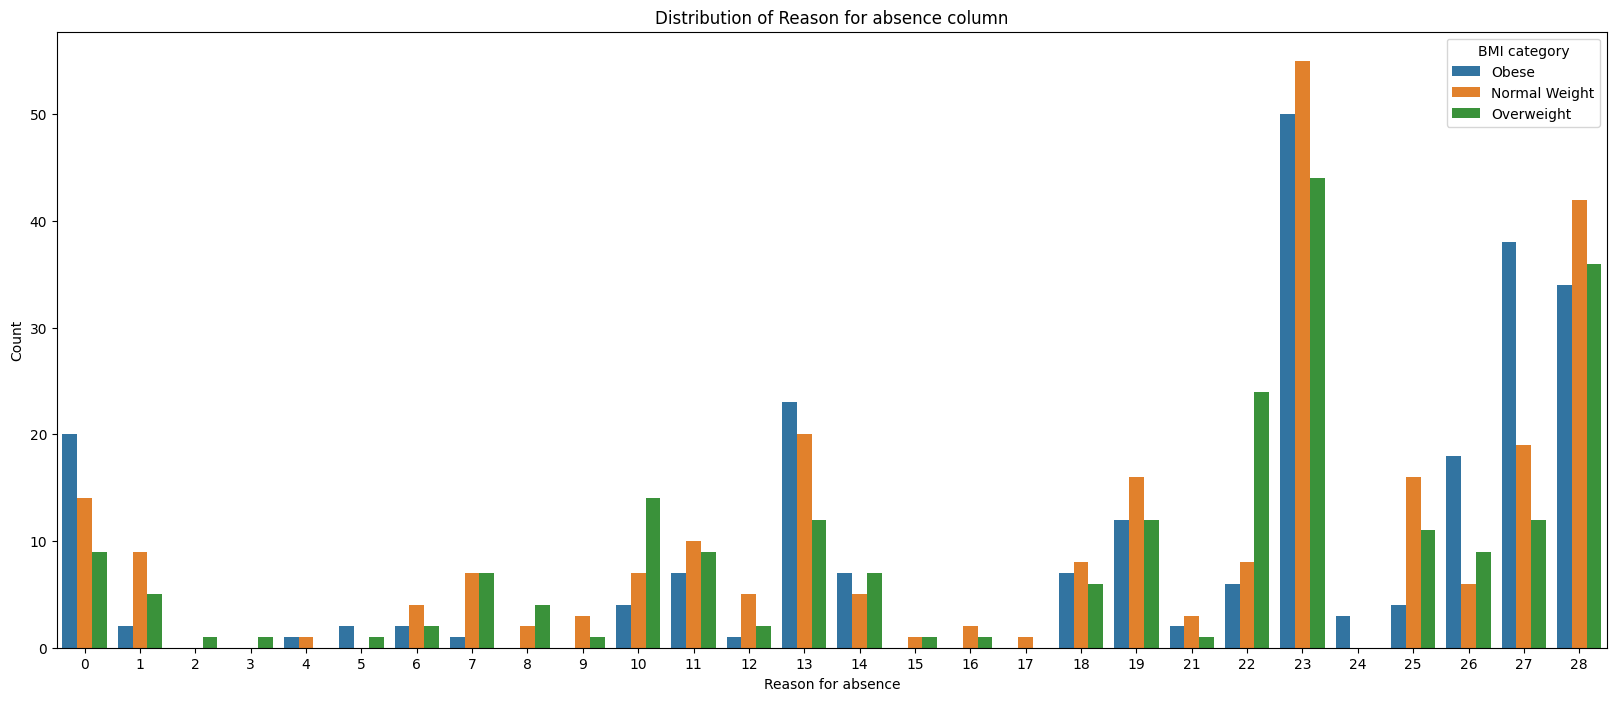

In [75]:
print(preprocessed_data.groupby('Disease')['BMI category'].value_counts())
plot_distribution('Reason for absence', figsize=(20, 8), hue='BMI category')

- Here is a quite intersting phenomena as the yes values in the Disciplinary failure only exist in the Reason 0 which indicates Unknown reason.
 and also the people succeeded in the Disciplinary test are more likely to be absent.

Disease  Disciplinary failure
No       No                      438
         Yes                      40
Yes      No                      262
Name: Disciplinary failure, dtype: int64


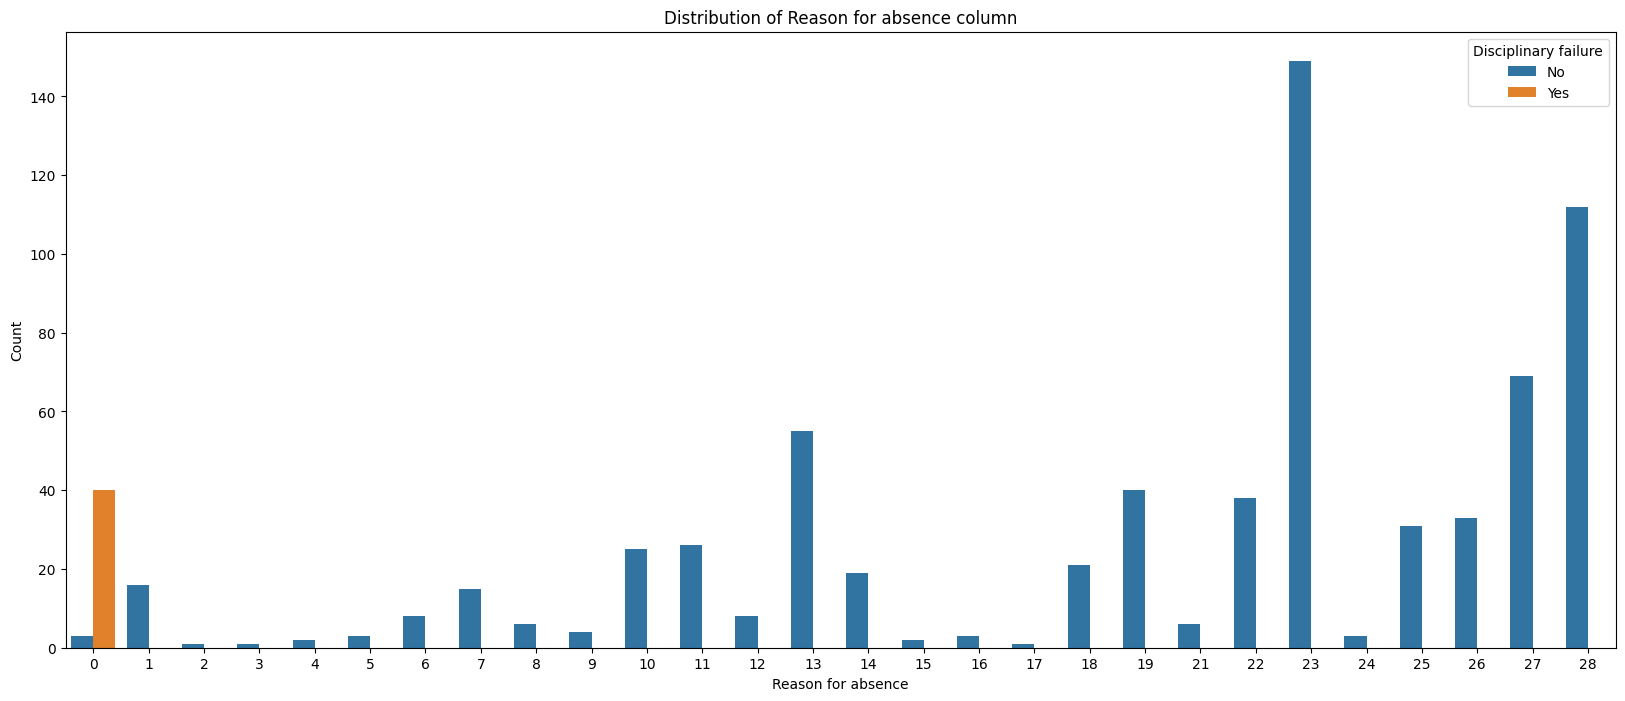

In [82]:
print(preprocessed_data.groupby('Disease')['Disciplinary failure'].value_counts())
plot_distribution('Reason for absence', figsize=(20, 8), hue='Disciplinary failure')

- Mid career professional are the top career level that tend to absent alot more than any other level.

Disease  Career level            
No       Mid career professional     249
         Early young adult           117
         Mid young adult              62
         Late career professional     48
         Pre-retirement                2
Yes      Mid career professional     116
         Early young adult            60
         Mid young adult              53
         Late career professional     27
         Pre-retirement                6
Name: Career level, dtype: int64


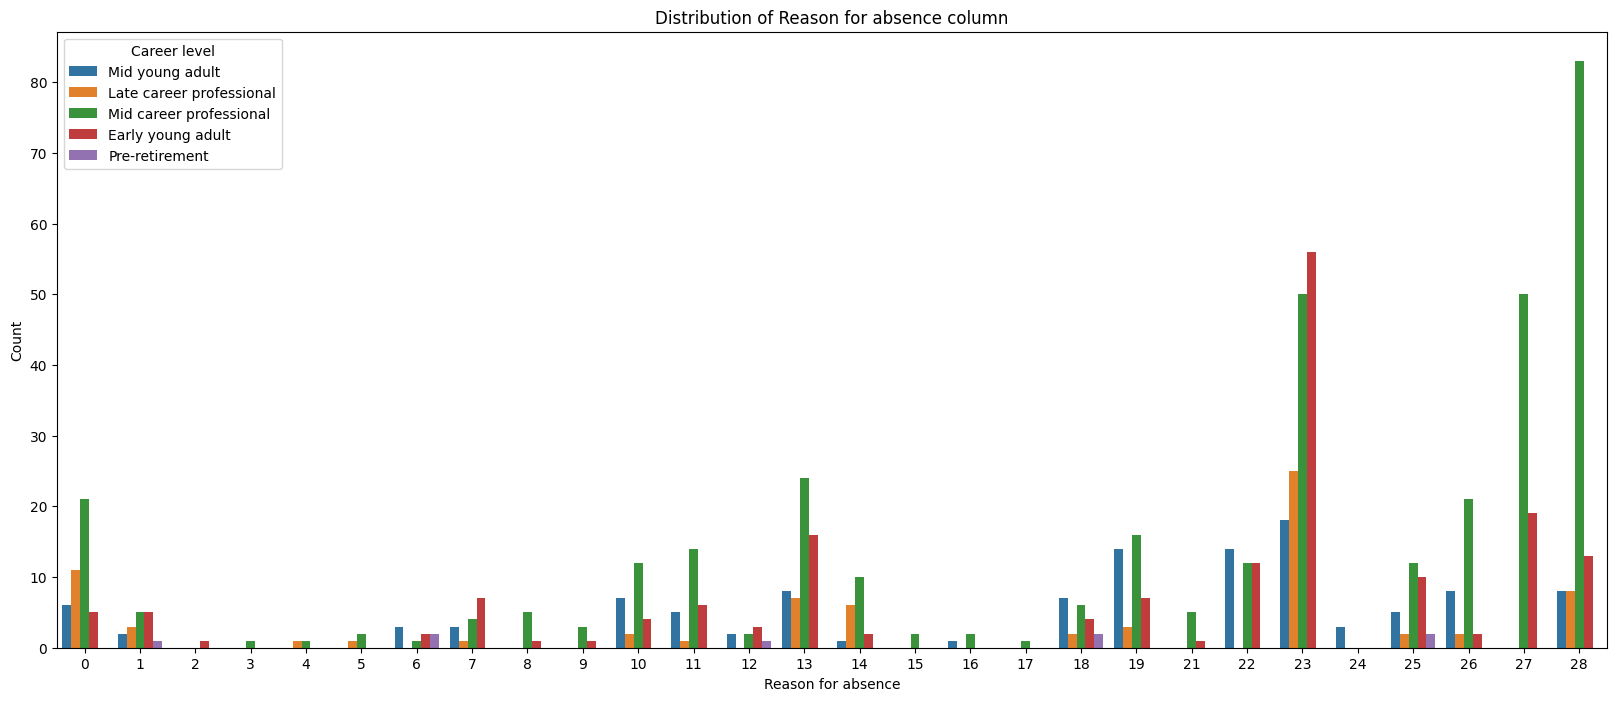

In [85]:
print(preprocessed_data.groupby('Disease')['Career level'].value_counts())
plot_distribution('Reason for absence', figsize=(20, 8), hue='Career level')